<a href="https://colab.research.google.com/github/gumberankush/AI-DataScience-Course/blob/main/Deep%20Learning/Keras_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predict fuel efficiency

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
# Get the data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
raw_dataset = pd.read_csv(url)

In [3]:
raw_dataset.tail()

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
392,27.0 4 140.0 86.00 2790. 15...
393,44.0 4 97.00 52.00 2130. 24...
394,32.0 4 135.0 84.00 2295. 11...
395,28.0 4 120.0 79.00 2625. 18...
396,31.0 4 119.0 82.00 2720. 19...


In [4]:
# Given column names
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

In [5]:
raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [6]:
raw_dataset.shape

(398, 8)

In [7]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [8]:
dataset = raw_dataset.copy()

In [9]:
# clean the data
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [10]:
dataset[dataset['Horsepower'].isna()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [11]:
# drop these rows
dataset = dataset.dropna()

In [12]:
dataset.shape

(392, 8)

In [13]:
dataset['Origin'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 3,
       3, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 2, 3, 3, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 3, 1, 2, 1, 2,
       2, 2, 2, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1,
       1, 1, 1, 2, 3, 3, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 1, 2, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3, 2, 3, 2, 3,
       2, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 1, 1, 3, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 1,

In [14]:
# "Origin" column is really categorical, not numeric. So convert that to a one-hot with pd.get_dummies
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [15]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


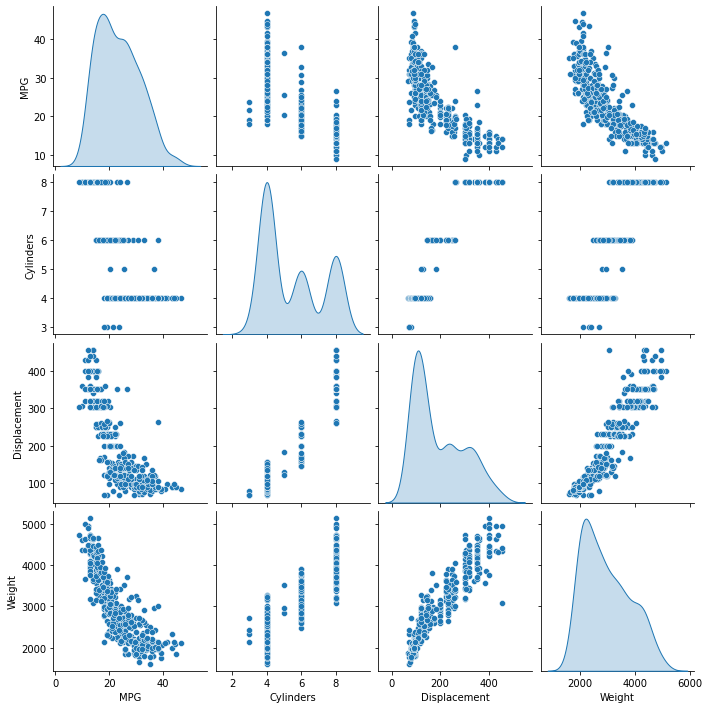

In [16]:
sns.pairplot(dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [17]:
# We can see that MPG is function of all other parameters

In [18]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.173469,0.201531,0.625000
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.379136,0.401656,0.484742
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


We can see here different ranges of all features. So we have to do scaling. This is important because the features and multiplied with model weights. So the scale of the outputs and the scale of gradients are affected by scale of inputs.

In [19]:
y = dataset['MPG']
X = dataset.drop(['MPG'],axis=1)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

mc = MinMaxScaler()
X_train = mc.fit_transform(X_train)
X_test = mc.transform(X_test)

In [22]:
X_train[:2]

array([[0.6       , 0.4025974 , 0.34782609, 0.56903884, 0.63690476,
        0.66666667, 0.        , 0.        , 1.        ],
       [0.2       , 0.18181818, 0.25      , 0.27190247, 0.41071429,
        0.5       , 0.        , 0.        , 1.        ]])

In [23]:
X_test[:2]

array([[0.2       , 0.06753247, 0.125     , 0.1633116 , 0.5952381 ,
        0.16666667, 1.        , 0.        , 0.        ],
       [0.2       , 0.13246753, 0.375     , 0.335129  , 0.45833333,
        0.66666667, 1.        , 0.        , 0.        ]])

In [24]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [95]:
# input_layer = Input(shape=(X.shape[1],))
# dense_layer_1 = Dense(5, activation='relu')(input_layer)
# dense_layer_2 = Dense(2, activation='relu')(dense_layer_1)
# output = Dense(1)(dense_layer_2)

# model = Model(inputs=input_layer, outputs=output)
# model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

# model = tf.keras.Sequential([
#   # tf.keras.layers.Dense(200, activation=tf.nn.relu),
#   # tf.keras.layers.Dense(100, activation=tf.nn.tanh),
#   tf.keras.layers.Dense(9, activation=tf.nn.relu),
#   tf.keras.layers.Dense(4, activation=tf.nn.relu),
#   tf.keras.layers.Dense(1) # this is 10 as we have 10 target values
# ])

model = tf.keras.Sequential()
model.add(Dense(5, input_dim=9, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [96]:
history = model.fit(X_train, y_train, batch_size=50, epochs=500, verbose=1, validation_split=0.2)

Epoch 1/500
5/5 [==============================] - 0s 29ms/step - loss: 573.0525 - mean_squared_error: 573.0525 - val_loss: 652.3024 - val_mean_squared_error: 652.3024
Epoch 2/500
5/5 [==============================] - 0s 6ms/step - loss: 569.0766 - mean_squared_error: 569.0766 - val_loss: 648.0108 - val_mean_squared_error: 648.0108
Epoch 3/500
5/5 [==============================] - 0s 7ms/step - loss: 564.7645 - mean_squared_error: 564.7645 - val_loss: 643.4794 - val_mean_squared_error: 643.4794
Epoch 4/500
5/5 [==============================] - 0s 6ms/step - loss: 560.2522 - mean_squared_error: 560.2522 - val_loss: 638.6581 - val_mean_squared_error: 638.6581
Epoch 5/500
5/5 [==============================] - 0s 5ms/step - loss: 555.6453 - mean_squared_error: 555.6453 - val_loss: 633.5869 - val_mean_squared_error: 633.5869
Epoch 6/500
5/5 [==============================] - 0s 6ms/step - loss: 550.7374 - mean_squared_error: 550.7374 - val_loss: 628.2471 - val_mean_squared_error: 628.24

In [97]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 5)                 50        
_________________________________________________________________
dense_43 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 5         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [98]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 700])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

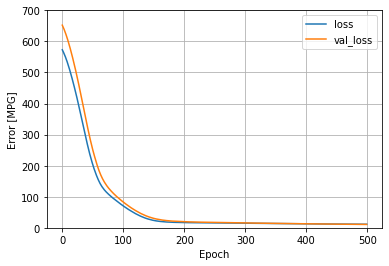

In [99]:
plot_loss(history)

In [100]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train))) # RMSE Score

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred))) # RMSE Score

print(r2_score(y_test, pred)) #R2 score

3.3657857396412463
3.356967725590022
0.7792103538924458
